<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Project: Resume Analysis from HeadHunter
   

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings(action = 'ignore')

# Data Structure Analysis

1. Read the data using the Pandas library. Tip: before reading, pay attention to the delimiter inside the file. 

In [99]:
hh_data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')
hh_data.shape

(44744, 12)

2. Display a few of the first (or last) rows of the table to make sure your data is not corrupted. Review the features and their structure.

In [100]:
hh_data.head(3)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано


3. Display the main information about the number of non-empty values in the columns and their data types in the table.

4. Pay attention to the information about the number of non-empty values.

In [101]:
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Display the main statistical information about the columns.


In [102]:
hh_data.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 2014 Тюменский Государствен...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Data Transformation

1. Let’s start with something simple — the feature **"Education & University"**. Its current format is: **Education level graduation year University major...**. For example:

* Higher education 2016 Moscow Aviation Institute (National Research University)...
* Incomplete higher education 2000 Baltic State Academy of the Fishing Fleet…

We are only interested in the education level.


Create a new feature **"Education"** using a transformation function. It should have 4 categories: "higher", "incomplete higher", "vocational secondary", and "secondary".

Perform the transformation, answer the control questions, and delete the "Education & University" feature.

Tip: pay attention to the text structure in the **"Education & University"** column. It is guaranteed that the candidate’s current education level is always contained within the first two words and starts with a capital letter. Use this fact.

*Tip: verify the resulting categories, for example, using the unique() method.*

In [103]:
def get_education(value):
    education = ' '.join(value.split()[:2])
    
    if education == 'Высшее образование':
        return 'higher'
    elif education == 'Неоконченное высшее':
        return 'incomplete higher'
    elif education == 'Среднее специальное':
        return 'vocational secondary'
    elif education == 'Среднее образование':
        return 'secondary'


hh_data['Education'] = hh_data['Образование и ВУЗ'].apply(get_education)
hh_data.drop('Образование и ВУЗ', axis=1, inplace=True)  # Remove the original column

secondary_count = hh_data[hh_data['Education'] == 'secondary'].shape[0]
print(f'{secondary_count} candidates have a secondary level of education (school education)')

559 candidates have a secondary level of education (school education)


2. Now we are interested in the column **"Gender, age"**. It is currently presented in the format **<Gender , age , date of birth>**. For example:

* Male , 39 years old , born on November 27, 1979
* Female , 21 years old , born on January 13, 2000

As you understand, we need to extract each parameter into a separate column.

Create two new features **"Gender"** and **"Age"**. It is important to consider the following:

* The gender feature must have 2 unique string values: 'M' — male, 'F' — female.
* The age feature must be represented as integers.

Perform the transformation, answer the control questions, and delete the "Gender, age" feature from the table.

*Tip: pay attention to the text structure in the column, specifically how the gender, age, and date of birth parameters are separated — by the symbol ' , '. It is guaranteed that the structure is the same for all rows in the table. You can use this.*

In [104]:
def get_gender(value):
    gender = value.split(' , ')[0]
    
    if gender == 'Мужчина':
        return 'M'
    elif gender == 'Женщина':
        return 'F'
    

def get_age(value):
    age = value.split(' , ')[1]
    return int(age.split()[0])


hh_data['Gender'] = hh_data['Пол, возраст'].apply(get_gender)
hh_data['Age'] = hh_data['Пол, возраст'].apply(get_age)
hh_data.drop('Пол, возраст', axis=1, inplace=True)  # Remove the original column

female_percentage = round((hh_data['Gender'] == 'F').mean() * 100, 2)
print(f'{female_percentage}% of the resumes in our dataset are from female candidates')

average_age = round(hh_data['Age'].mean(), 1)
print(f'{average_age} years is the average age of the candidates')

19.07% of the resumes in our dataset are from female candidates
32.2 years is the average age of the candidates


3. Next, we will transform the feature **"Work experience"**. Its current format is: **<Work experience: n years m months, employment periods in various companies…>**.

From this column, we need to extract the applicant’s total work experience in months; we will name the new feature "Work experience (months)".

Let’s first agree on the conditions for the task:

* First, this feature contains missing values. If we encounter a missing value, we leave it as is (the transformation function returns NaN).
* Second, this feature contains hidden missing values. For some applicants, the column contains the value "Not specified". We will also mark these as NaN (the transformation function returns NaN).
* Third, we are not interested in the information that appears after the work-experience indication (the employment periods at different companies).
* Fourth, there is a nuance: work experience may be provided only in years or only in months. For example, you may encounter:

    * Work experience 3 years 2 months…
    * Work experience 4 years…
    * Work experience 11 months…

Take this nuance into account in your code.

As a result of the transformation, you should obtain a column containing the number of months the applicant has worked.
Perform the transformation, answer the control questions, and delete the **"Work experience"** column from the table.


In [ ]:
def parse_experience_to_months(text):
    """
    Parse Russian 'Опыт работы' text like:
      - 'Опыт работы: 3 года 2 месяца, ...'
      - 'Опыт работы 4 года ...'
      - 'Опыт работы 11 месяцев ...'
      - 'Не указано'
    Return total months as int, or np.nan if missing/unspecified.
    """
    if not text or text=='Не указано':
        return np.nan
    
    experiance = str(text).split()[:6]
    years = 0
    months = 0
    
    for i, word in enumerate(experiance):
        
        if 'год' in word or 'лет' in word:
            years = int(experiance[i - 1])
        
        if 'месяц' in word:
            months = int(experiance[i - 1])

    return years * 12 + months


hh_data['Work experience (months)'] = hh_data['Опыт работы'].apply(parse_experience_to_months)
hh_data.drop('Опыт работы', axis=1, inplace=True)  # Remove the original column

median_experiance = hh_data['Work experience (months)'].median()
print(f'{median_experiance} months is the median work experience in our table')

99.0 months is the median work experience in our table


4. Great progress! Next up is the feature “City, relocation, business trips”. The information is presented as: **<City , (metro) , relocation readiness (cities to relocate to) , business-trip readiness>**. Parentheses indicate optional parts. For example, you may encounter:

* Moscow, not willing to relocate, willing to travel for business
* Moscow, m. Belomorskaya, not willing to relocate, not willing to travel for business
* Voronezh, willing to relocate (Sochi, Moscow, Saint Petersburg), willing to travel for business

We will create separate features: **"City"**, **"Willing to relocate"**, **"Willing to travel for business"**. Keep in mind:


* The **"City"** feature must contain only 4 categories: "Moscow", "Saint Petersburg", "million-plus city" (see list below), and "other".

    List of million-plus cities:
    ```Python
    million_cities = [
        'Novosibirsk', 'Yekaterinburg', 'Nizhny Novgorod', 'Kazan',
        'Chelyabinsk', 'Omsk', 'Samara', 'Rostov-on-Don', 'Ufa',
        'Krasnoyarsk', 'Perm', 'Voronezh', 'Volgograd'
    ]
    ```

    Metro proximity information is not of interest.


* The **"Willing to relocate"** feature must be boolean: True or False. Note there may be different phrasings in the original "City, relocation, business trips" field, e.g.:

    * … , willing to relocate , …
    * … , not willing to relocate , …
    * … , willing to relocate (Moscow, Saint Petersburg, Rostov-on-Don)
    * … , want to relocate (USA) , …

    We are interested only in the fact of willingness or desire to relocate.


* The **"Willing to travel for business"** feature must be boolean: True or False. Phrasings may vary as well, e.g.:

    * … , willing to travel for business , …
    * … , willing to take occasional business trips , …
    * … , not willing to travel for business , …

    Again, we only care about the fact of willingness.

    Important: For some applicants, business-trip readiness was “lost” during export. By default, assume such applicants are not willing to travel for business (False).


Perform the transformations and delete the **"City, relocation, business trips"** column from the table.

*Tip: the text structure may change depending on whether the nearest metro is provided. Account for this if you rely on word order.*

In [ ]:
def get_city(arg):
    million_cities = [
        'Новосибирск', 'Екатеринбург', 'Нижний Новгород',
        'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 
        'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград'
    ]
    city = arg.split(' , ')[0]
    
    if city == 'Москва':
        return 'Moscow'
    elif city == 'Санкт-Петербург':
        return 'Saint Petersburg'
    elif city in million_cities:
        return 'million-plus city'
    else:
        return 'other'


def get_ready_to_move(arg):
    
    if ('не готов к переезду' in arg) or ('не готова к переезду' in arg):
        return False
    elif 'хочу' in arg:
        return True
    else:
        return True


def get_ready_for_bisiness_trips(arg):
    
    if ('командировка' in arg):
        
        if ('не готов к командировкам' in arg) or('не готова к командировкам' in arg):
            return False
        else:            
            return True
        
    else:
        return False


hh_data['City'] = hh_data['Город, переезд, командировки'].apply(get_city)
hh_data['Willing to relocate'] = hh_data['Город, переезд, командировки'].apply(get_ready_to_move)
hh_data['Willing to travel for business'] = hh_data['Город, переезд, командировки'].apply(get_ready_for_bisiness_trips)
hh_data.drop('Город, переезд, командировки', axis=1, inplace=True)  # Remove the original column

spb_count = (hh_data['City'] == 'Saint Petersburg').sum()
percentage_spb = round(spb_count / hh_data.shape[0] * 100)
print(f"{percentage_spb}% of candidates live in Saint Petersburg")

ready_both = (hh_data['Willing to relocate']
    & hh_data['Willing to travel for business'])  # Mask: Ready to move AND travel at the same time
percentage_both = round(ready_both.mean() * 100)  # .mean() on bool = True ratio
print(f'{percentage_both}% of candidates are willing both to relocate and to travel for busines')


11% of candidates live in Saint Petersburg
32% of candidates are willing both to relocate and to travel for busines


5. Let’s take a closer look at the features **“Employment”** and **“Schedule”**. Currently, these features represent sets of categories of the desired employment type (full-time, part-time, project work, volunteering, internship) and the desired work schedule (day shift, shift schedule, flexible schedule, remote work, rotational/shift method).

On hh.ru, applicants can specify different combinations of these categories, for example:
* full-time, part-time
* part-time, project work, volunteering
* day shift, remote work
* rotational method, flexible schedule, remote work, full-time

This representation yields many different combinations, and thus many unique values, which hinders analysis. We need to fix that!

Let’s create indicator features (“one-hot flags”) for each category: if a category is present in the applicant’s desired options, set True in that column for the given row; otherwise - False.

This transformation of categorical features is called One-Hot Encoding, and its scheme is shown in the figure below:

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>

Perform this transformation for the “Employment” and “Schedule” features, answer the control questions, and then delete them from the table.

In [107]:
# --- Acceptable categories (as on hh.ru) ---
employment_categories = [
    'полная занятость',
    'частичная занятость',
    'проектная работа',
    'волонтерство',
    'стажировка',
]

schedule_categories = [
    'полный день',
    'сменный график',
    'гибкий график',
    'удаленная работа',
    'вахтовый метод',
]


def split_and_normalize(cell):
    """
    Accepts a comma-separated string of categories and returns a set of
    normalized values ​​(lowercase, extra spaces removed).
    If NaN/empty, returns an empty set.
    """
    if pd.isna(cell):
        return set()
    
    # Separate by commas (there may be a different number of spaces)
    parts = [p.strip().lower() for p in str(cell).split(',')]
    
    # We remove empty elements and extra spaces inside
    cleaned = set()
    
    for p in parts:
        p = re.sub(r'\s+', ' ', p).strip()
        
        if p:
            cleaned.add(p)
            
    return cleaned


# Transforming the "Employment"
employment_sets = hh_data['Занятость'].apply(split_and_normalize)
for cat in employment_categories:
    hh_data[cat] = employment_sets.apply(lambda s: cat in s)

# Transforming the "Schedule"
schedule_sets = hh_data['График'].apply(split_and_normalize)
for cat in schedule_categories:
    hh_data[cat] = schedule_sets.apply(lambda s: cat in s)

# Remove the original columns
hh_data.drop(['Занятость', 'График'], axis=1, inplace=True)

count_both = (hh_data['проектная работа'] & hh_data['волонтерство']).sum()
print(f"{count_both} people are looking for both project work and volunteering (True in both columns)")

count_both = (hh_data['вахтовый метод'] & hh_data['гибкий график']).sum()
print(f"{count_both} people want to work using the rotational method and with a flexible schedule (True in both columns)")

436 people are looking for both project work and volunteering (True in both columns)
2311 people want to work using the rotational method and with a flexible schedule (True in both columns)


6. Finally, we’ve reached the most important feature — salary (**“ЗП”**).
The issue: in addition to the desired salary amount, the applicant specifies the currency, for example:

30000 RUB
50000 UAH
550 USD

We want to see all salaries in a single currency — for instance, in rubles (RUB). Where do we get the exchange rates against the ruble?

While Python offers many ways to obtain this information (e.g., Central Bank APIs or libraries like pycbrf), that is not our focus here.

So we’ll proceed directly: use specialized online resources that provide exchange rates as text/CSV files. For example, MDF.RU allows convenient export of currency and stock prices over selected periods as CSV. We have already exported the rates for the currencies present in our data for the period from 2017-12-29 to 2019-12-05. You can download it **on the platform**.

Create a new DataFrame from the downloaded file. In the table we care about the columns:

* currency — currency in ISO notation,
* date — date,
* proportion — proportion (units the price refers to),
* close — closing price (last recorded exchange rate for that day).

Below is a mapping table of foreign currency names in our data and their conventional abbreviations in the exchange-rate file. Proportion means the number of currency units to which the quoted price applies. For example, for Kazakh tenge, the rate on 2019-08-20 is 17.197 RUB per 100 KZT; then the per-unit rate is 17.197 / 100 = 0.17197 RUB per 1 KZT. Use this information.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>

The date to match the rate by comes from the feature **“Обновление резюме”** (resume update), which contains the date and time when the applicant posted the current version of their resume. We only need the date for matching.

Now we have all the information needed to create the feature “ЗП (руб)” — salary in rubles.

After answering the control questions, delete the original “ЗП” column and any intermediate columns you created.

So, let’s discuss a possible transformation algorithm:

1. Convert the feature “Resume Update” from the resume table into datetime format and extract the date. Convert the “date” feature from the currency table into the same format.
2. Extract from the “Salary” column the desired salary amount and the name of the currency in which it is specified. Convert the currency name to the ISO standard according to the table above.
3. Join the resume table with the currency rates table using the date and currency columns (consider which type of join to choose so that the resume table retains salary data originally expressed in rubles). Fill the close value for rubles with 1 (the ruble’s own exchange rate).
4. Multiply the desired salary amount by the joined currency exchange rate (close) and divide by the proportion (pay attention to missing values in these columns after the join). Store the result in a new column “Salary (RUB)”.

In [108]:
# DataFrame with exchange rates
exchange_rates = pd.read_csv('data/ExchangeRates.csv')
exchange_rates = exchange_rates[['currency', 'date', 'proportion', 'close']]


# 'Salary' and 'currency' attributes in the table with applicants
def get_currency(salary):
    splited_salary = salary.split(' ')
    iso_codes = ['USD', 'EUR', 'KGS', 'AZN', 'KZT']
    
    if splited_salary[1] in iso_codes:
        return splited_salary[1]
    
    if splited_salary[1] == 'руб.':
        return 'RUB'
    
    if splited_salary[1] == 'бел.руб.':
        return 'BYN'
    
    if splited_salary[1] == 'грн.':
        return 'UAH'
    
    if splited_salary[1] == 'сум':
        return 'UZS'


hh_data['Salary'] = hh_data['ЗП'].apply(lambda x: float(x.split(' ')[0]))
hh_data['currency'] = hh_data['ЗП'].apply(get_currency)

# converting dates to datetime format
hh_data['Обновление резюме'] = pd.to_datetime(hh_data['Обновление резюме'], dayfirst=True).dt.date
exchange_rates['date'] = pd.to_datetime(exchange_rates['date'], dayfirst=True).dt.date

# merge the tables and fill empty values ​​'proportion' and 'close' with 1
hh_data['date'] = hh_data['Обновление резюме']
hh_data = hh_data.merge(exchange_rates, on=['date', 'currency'], how='left')
hh_data = hh_data.fillna({'proportion': 1, 'close': 1})

# create feature "Salary (RUB)"
hh_data['Salary (RUB)'] = round(hh_data['Salary'] * hh_data['close'] / hh_data['proportion'], 2)
median_salary = round(hh_data['Salary (RUB)'].median() / 1000)

# delete the original salary column "ЗП" and all intermediate columns
hh_data = hh_data.drop(
    ['ЗП', 'Salary', 'currency', 'date', 'proportion', 'close'],
    axis=1)
print(f'{median_salary} thousands is the median desired salary of candidates in our table (in rubles)')

59 thousands is the median desired salary of candidates in our table (in rubles)


# Exploring Dependencies in Data

1. Plot the distribution of the feature **'Age'**. Describe the distribution by answering the following questions: what is the mode of the distribution, what are the minimum and maximum values of the feature, in which approximate interval does the age of most applicants fall? Are there any anomalies in the age feature, and which values would you classify as such?
*Tip: plot a histogram and a boxplot side by side.*

30 is the modal value of the applicants’ age


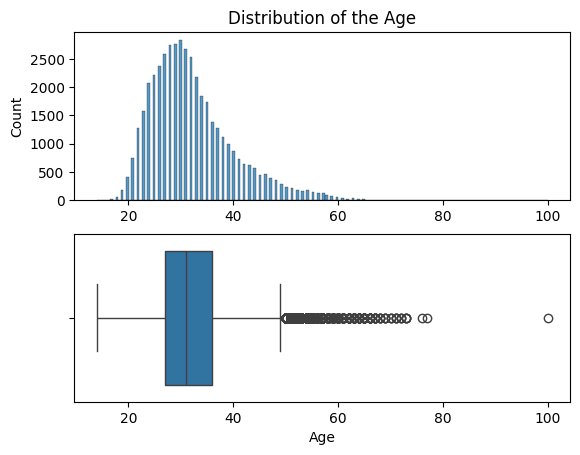

In [109]:
fig, ax = plt.subplots(nrows=2, ncols=1)
histogram = sns.histplot(data=hh_data, x='Age', ax=ax[0])
histogram.set_title('Distribution of the Age')
histogram.set_xlabel('')
boxplot = sns.boxplot(data=hh_data, x='Age', ax=ax[1]);

modal_age = hh_data['Age'].mode()[0]
print(f'{modal_age} is the modal value of the applicants’ age')

* The feature values range from 10 to 100 years, and the age of **most** applicants falls approximately between 20 and 40 years.
* There is an anomaly at 100 years for this feature. I would classify ages starting from 80 years as anomalous.

2. Plot the distribution of the feature **'Work Experience (months)'**. Describe this distribution by answering the following questions: what is the mode of the distribution, what are the minimum and maximum values of the feature, in which approximate interval does the work experience of most applicants fall? Are there any anomalies in the work experience feature, and which values would you classify as such?
*Tip: plot a histogram and a boxplot side by side.*

1188.0 is the maximum work experience (in months)


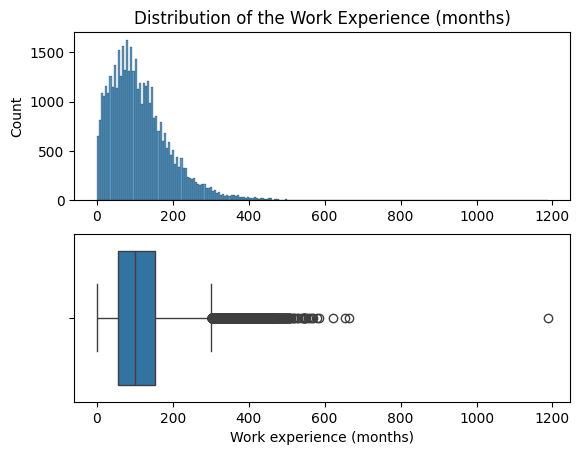

In [110]:
fig, ax = plt.subplots(nrows=2, ncols=1)
histogram = sns.histplot(data=hh_data, x='Work experience (months)', ax=ax[0])
histogram.set_title('Distribution of the Work Experience (months)')
histogram.set_xlabel('')
boxplot = sns.boxplot(data=hh_data, x='Work experience (months)', ax=ax[1]);

max_experiance = hh_data['Work experience (months)'].max()
print(f'{max_experiance} is the maximum work experience (in months)')

* The mode of the distribution is around 80 months.
* The feature values range from 0 to 1200 months, and the experiance of **most** applicants falls approximately between 0 and 200 months.
* There is an anomaly at max value for this feature. I would classify experiances starting from 800 months as anomalous.

3. Plot the distribution of the feature **'Salary (RUB)'**. Describe this distribution by answering the following questions: what are the minimum and maximum values of the feature, in which approximate interval does the salary of most applicants fall? Are there any anomalies in the salary feature? Pay attention to the extremely large desired salary values.
*Tip: plot a histogram and a boxplot side by side.*

5 applicants require a salary above 1,000,000 rubles.


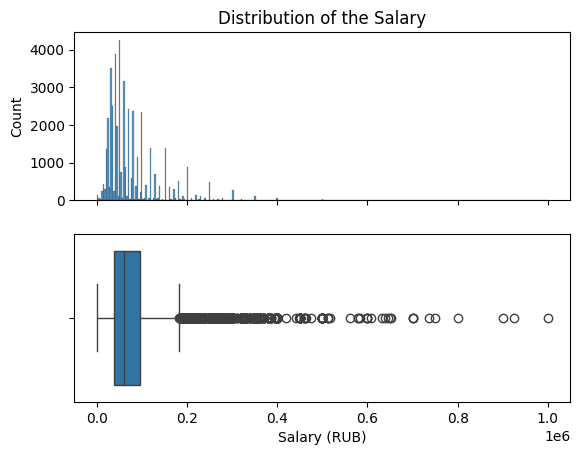

In [111]:
fig, ax = plt.subplots(nrows=2, ncols=1)
histogram = sns.histplot(
    data=hh_data[hh_data['Salary (RUB)'] <= 1e6],
    x='Salary (RUB)', ax=ax[0]
)
histogram.set_title('Distribution of the Salary')
histogram.set_xticklabels('')
histogram.set_xlabel('')
boxplot = sns.boxplot(
    data=hh_data[hh_data['Salary (RUB)'] <= 1e6],
    x='Salary (RUB)', ax=ax[1]
);

high_salary = hh_data[hh_data['Salary (RUB)'] > 1e6].shape[0]
print(f'{high_salary} applicants require a salary above 1,000,000 rubles.')

* The mode of the distribution is around 50,000 rubles.
* The salary of most applicants falls approximately within the range of 30,000 to 100,000 rubles.
* I would classify all values above one million rubles as anomalies.

4. Plot a chart showing the dependence of the **median** desired salary (**'Salary (RUB)'**) on education level (**'Education'**). For the chart, use resume data where the desired salary is less than 1 million rubles.
*Make conclusions from the chart: which education levels exhibit the highest and lowest desired salary levels? In your opinion, is the education level feature important for salary prediction?*

"higher" education category has the highest median salary


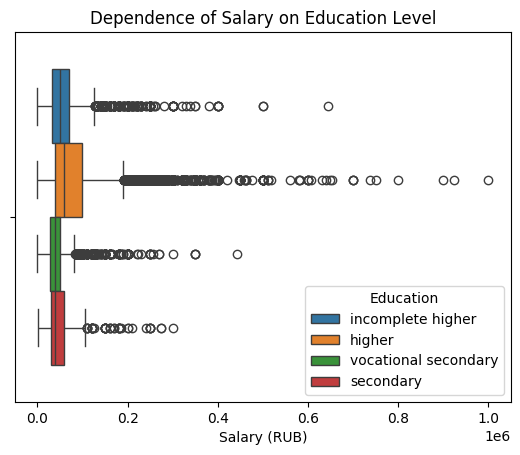

In [112]:
boxplot = sns.boxplot(
    data=hh_data[hh_data['Salary (RUB)'] <= 1e6],
    x='Salary (RUB)', hue='Education'
)
boxplot.set_title('Dependence of Salary on Education Level');

highest_salary = hh_data.groupby('Education')['Salary (RUB)'].median().sort_values(ascending=False).index[0]
print(f'"{highest_salary}" education category has the highest median salary')

* For secondary and vocational secondary educations, the lowest levels of desired salary are observed.
* I consider the education level feature important for predicting salary.

5. Plot a chart showing the distribution of desired salary (**'Salary (RUB)'**) by city (**'City'**). Use resume data where the desired salary is less than 1 million rubles.
*Make conclusions from the chart: how do the median levels of desired salary and their spread compare across cities? In your opinion, is the city feature important for predicting salary?*

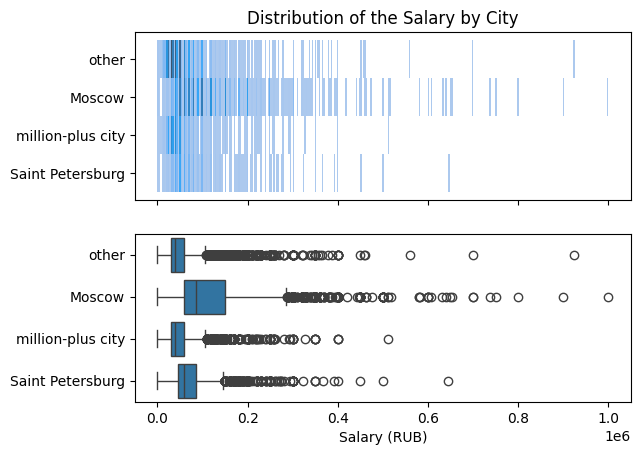

In [113]:
fig, ax = plt.subplots(nrows=2, ncols=1)
histogram = sns.histplot(
    data=hh_data[hh_data['Salary (RUB)'] <= 1e6],
    x='Salary (RUB)', ax=ax[0], y='City'
)
histogram.set_title('Distribution of the Salary by City')
histogram.set_xticklabels('')
histogram.set_xlabel('')
histogram.set_ylabel('')
boxplot = sns.boxplot(
    data=hh_data[hh_data['Salary (RUB)'] <= 1e6],
    x='Salary (RUB)', ax=ax[1], y='City'
)
boxplot.set_ylabel('');

* The higher the median level of desired salary, the wider its range.
* I consider the city feature important for predicting salary.

6. Build a **multi-level bar chart** showing the median salary (**'Salary (RUB)'**) by **'Willingness to relocate'** and **'Willingness to travel'**. Analyze the chart by comparing salary levels across the categories.

66 thousands is the median desired salary of applicants who are willing to both relocate and travel


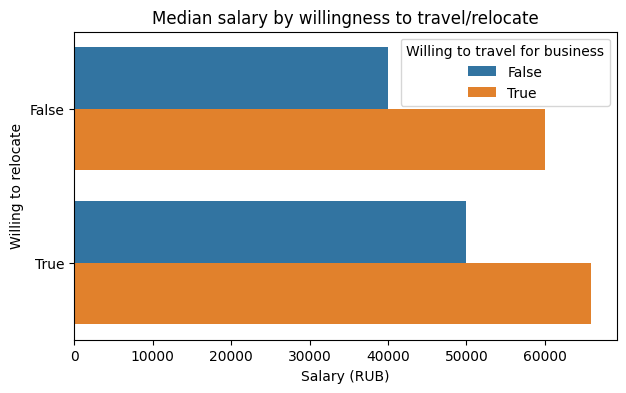

In [145]:
bar_data = hh_data.groupby(
    ['Willing to travel for business', 'Willing to relocate'],
    as_index=False
)['Salary (RUB)'].median()

plt.figure(figsize=(7, 4))
barplot = sns.barplot(
    data=bar_data,
    y='Willing to relocate',
    x='Salary (RUB)',
    hue='Willing to travel for business',
    orient='h'
)
barplot.set_title('Median salary by willingness to travel/relocate');

mask1 = bar_data['Willing to travel for business'] == True
mask2 = bar_data['Willing to relocate'] == True
both_true_median = round(bar_data[mask1 & mask2]['Salary (RUB)'].iloc[0] / 1000)
print(f'{both_true_median} thousands is the median desired salary of applicants who are willing to both relocate and travel')

Willingness to travel and relocate increases the median salary.

7. Build a pivot table illustrating how the **median** desired salary depends on **Age** and **Education**. Using this pivot table, create a **heatmap**. Analyze the heatmap by comparing the metrics within groups.

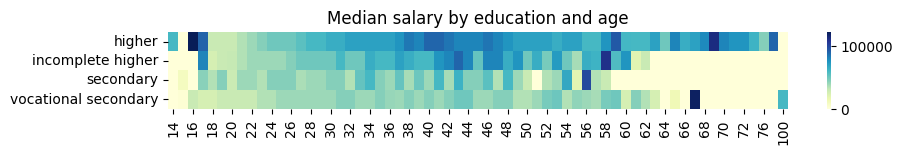

In [ ]:
pivot = hh_data.pivot_table(
    index='Education',
    columns='Age',
    values='Salary (RUB)',
    aggfunc='median',
    fill_value=0
)

plt.figure(figsize=(10, 1))
heatmap = sns.heatmap(pivot, cmap='YlGnBu')
heatmap.set_title('Median salary by education and age')
heatmap.set_xlabel('')
heatmap.set_ylabel('');

Higher education category exhibits the fastest career growth (i.e., the highest rate of salary increase).

8. Plot a **scatter plot** showing the relationship between work experience (**'Work Experience (months)'**) and age (**'Age'**). Convert work experience from months to years so the features are on the same scale. Additionally, draw a line passing through the points (0, 0) and (100, 100). This line corresponds to cases where work experience equals a person’s age. Points lying on or above this line are anomalies in our data (work experience greater than or equal to the applicant’s age).

7 points lie strictly above the plotted line


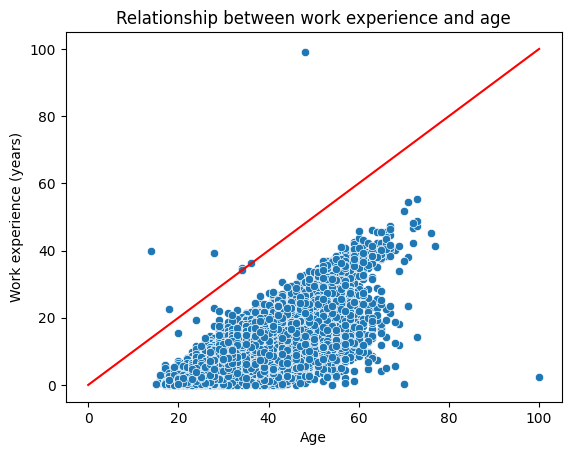

In [ ]:
scatter_data = hh_data.copy()
scatter_data['Work experience (years)'] = scatter_data['Work experience (months)'] / 12

line = sns.lineplot(x=[0, 100], y=[0, 100], c='red')
scatter = sns.scatterplot(
    data=scatter_data,
    x='Age',
    y='Work experience (years)'
)
scatter.set_title('Relationship between work experience and age');

outliers = scatter_data[scatter_data['Work experience (years)'] > scatter_data['Age']].shape[0]
print(f'{outliers} points lie strictly above the plotted line')

**Additional Points**

To earn 2 extra points for the exploratory analysis, create two additional meaningful graphs or charts that help illustrate the impact of features, the relationships between features, or the distribution of features. Provide conclusions based on them. Ideally, the analysis should include features that we previously created in the “Data Transformation” section.

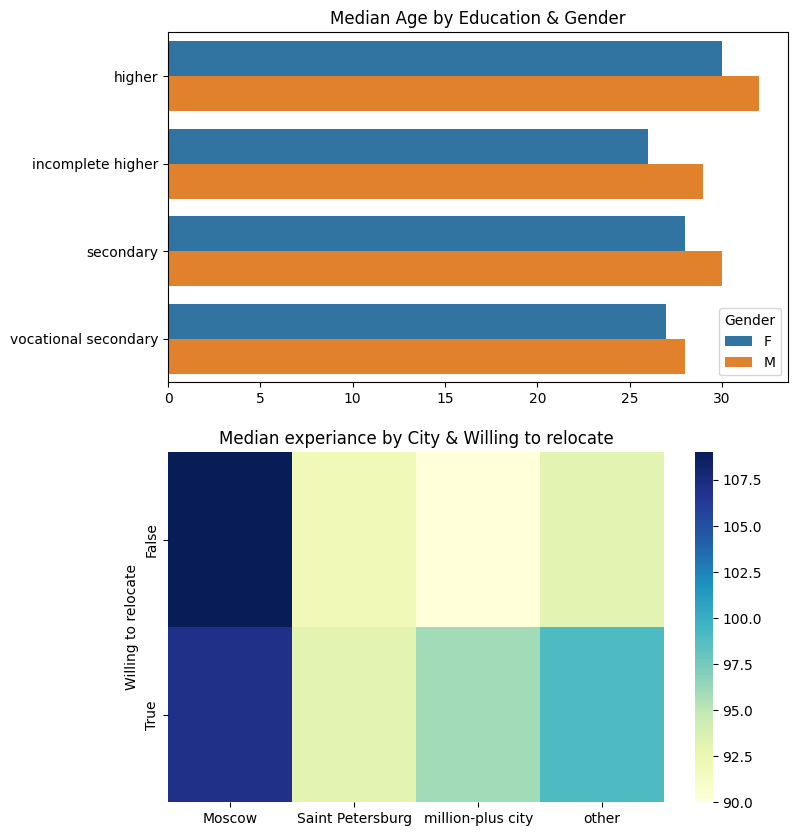

In [215]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

bar_data = hh_data.groupby(
    ['Gender', 'Education'],
    as_index=False
)['Age'].median()
barplot = sns.barplot(
    data=bar_data,
    y='Education',
    x='Age',
    hue='Gender',
    orient='h',
    ax=ax[0]
)
barplot.set_title('Median Age by Education & Gender')
barplot.set_xlabel('')
barplot.set_ylabel('')

pivot = hh_data.pivot_table(
    index='Willing to relocate',
    columns='City',
    values='Work experience (months)',
    aggfunc='median',
    fill_value=0
)
heatmap = sns.heatmap(pivot, cmap='YlGnBu', ax=ax[1])
heatmap.set_title('Median experiance by City & Willing to relocate')
heatmap.set_xlabel('');

* Regardless of education level, the median age of women is always lower (possibly underreported). The highest median age is among candidates with higher education, while the lowest is among candidates with incomplete higher education (possibly still students).
* The most experienced candidates work in Moscow, and only in Moscow does the desire to relocate decrease as work experience increases.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [ ]:
# ваш код здесь

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [ ]:
# ваш код здесь

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [ ]:
# ваш код здесь

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [ ]:
# ваш код здесь

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [12]:
# ваш код здесь

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

In [ ]:
# ваш код здесь

ваш коммментарий здесь